### Do your imports!

In [175]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# 311 data analysis

## Read in `subset.csv` and review the first few rows

Even though it's a giant file – gigs and gigs! – it's a subset of the [entire dataset](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). It covers plenty of years, but not all of the columns.

If your computer is struggling (which it will!) or you are impatient, feel free to use `nrows=` when reading it in to speed up the process by only reading in a subset of columns. Pull in at least a few million, or a couple years back.

In [371]:
df = pd.read_csv('subset.csv', nrows=4000000, low_memory=False, parse_dates=['Created Date', 'Closed Date'])

In [372]:
df.sort_values('Created Date', ascending=False)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Address Type,City,Status,Borough,Open Data Channel Type
3996346,51446513,2021-08-06 09:35:00,2021-08-07 05:06:59,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,11216,663 DEKALB AVENUE,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE
3997294,51446553,2021-08-06 08:20:00,2021-08-06 12:00:00,DSNY,Department of Sanitation,Missed Collection (All Materials),1 Missed Collection,Sidewalk,11210,1375 EAST 29 STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,ONLINE
3919357,51437914,2021-08-06 00:16:52,2021-08-06 06:29:49,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),10014,4 8 AVENUE,ADDRESS,NEW YORK,Closed,MANHATTAN,PHONE
3919351,51437913,2021-08-05 22:41:46,2021-08-06 12:25:13,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10460,1968 MARMION AVENUE,ADDRESS,BRONX,Closed,BRONX,PHONE
3865191,51436469,2021-08-05 21:04:43,2021-08-06 12:26:27,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10451,751 WALTON AVENUE,ADDRESS,BRONX,Closed,BRONX,PHONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1322516,15635338,2010-01-01 00:00:00,2010-02-04 00:00:00,HPD,Department of Housing Preservation and Development,ELECTRIC,LIGHTING,RESIDENTIAL BUILDING,10019,427 WEST 51 STREET,ADDRESS,NEW YORK,Closed,Unspecified,UNKNOWN
1322515,15634915,2010-01-01 00:00:00,2010-01-28 00:00:00,HPD,Department of Housing Preservation and Development,PLUMBING,BASIN/SINK,RESIDENTIAL BUILDING,11214,2076 CROPSEY AVENUE,ADDRESS,BROOKLYN,Closed,Unspecified,UNKNOWN
1322514,15634766,2010-01-01 00:00:00,2010-01-06 00:00:00,HPD,Department of Housing Preservation and Development,HEATING,HEAT,RESIDENTIAL BUILDING,10469,1284 ARNOW AVENUE,ADDRESS,BRONX,Closed,Unspecified,UNKNOWN
1322513,15634965,2010-01-01 00:00:00,2010-01-06 00:00:00,HPD,Department of Housing Preservation and Development,HEATING,HEAT,RESIDENTIAL BUILDING,10459,919 PROSPECT AVENUE,ADDRESS,BRONX,Closed,Unspecified,UNKNOWN


### Where the subset came from

If you're curious, I took the [original data](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9/data) and clipped out a subset by using the command-line tool [csvkit](https://csvkit.readthedocs.io/en/latest/).

First I inspected the column headers:

```bash
$ csvcut -n 311_Service_Requests_from_2010_to_Present.csv 
```

Then I selected the columns I was interested in and saved it to a file.

```bash
$ csvcut -c 1,2,3,4,5,6,7,8,9,10,16,17,20,26,29 311_Service_Requests_from_2010_to_Present.csv > subset.csv
```

This was much much much much faster than doing it in Python.

## We want more columns!

**Right now we don't see all of the columns.** For example, mine has `...` between the **Incident Address** column and the **City** column. Go up to the top where you imported pandas, and add a `pd.set_option` line that will allow you to view all of the columns of the dataset.

## We hate those column names!

Change the column names to be tab- and period-friendly, like `df.created_date` instead of `df['Created Date']`

In [373]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.dtypes

unique_key                         int64
created_date              datetime64[ns]
closed_date               datetime64[ns]
agency                            object
agency_name                       object
complaint_type                    object
descriptor                        object
location_type                     object
incident_zip                      object
incident_address                  object
address_type                      object
city                              object
status                            object
borough                           object
open_data_channel_type            object
dtype: object

# Dates and times

## Are the datetimes actually datetimes?

We're going to be doing some datetime-y things, so let's see if the columns that look like dates are actually dates.

In [374]:
#no they're not!

## In they aren't datetimes, convert them

The ones we're interested in are as follows:

* Created Date
* Closed Date

You have two options to convert them:

1. Do it like we did in class, but **overwrite the existing string columns with the new datetime versions**
2. Find an option with `read_csv` to automatically read certain columns as dates! Use the shift+tab trick to read the `read_csv` docs to uncover it. Once you find it, you'll set it to be the **list of date-y columns**.

They're both going to take forever if you do them wrong, but can be faster with a few tricks. For example, using `pd.to_datetime` can be sped up significantly be specifying the format of the datestring.

For example, if your datetime was formatted as `YYYY-MM-DD HH:MM:SS AM`, you could use the following:

```
df.my_datetime = pd.to_datetime(df.my_datetime, format="%Y-%m-%d %I:%M:%S %p")
```

It's unfortunately much much much faster than the `read_csv` technique. And yes, [that's `%I` and not `%H`](https://strftime.org/).

> *Tip: What should happen if it encounters an error or missing data?*

In [375]:
#see read_csv row

## According to the dataset, which month of the year has the most 311 calls?

The kind of answer we're looking for is "January," not "January 2021"

In [376]:
# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other

In [377]:
df.created_date.dt.month_name().value_counts().nlargest(1)

March    442311
Name: created_date, dtype: int64

In [378]:
#dt because we're grouping months across the entire dataset rather than individually

## According to the dataset, which month has had the most 311 calls?

The kind of answer we're looking for is "January 2021," not "January" (although _techniucally_ it will say `2021-01-31`, not `January 2021`)

In [379]:
# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other

In [380]:
df.resample('M', on='created_date').size().sort_values(ascending=False).nlargest(1)

created_date
2019-05-31    213295
dtype: int64

In [381]:
#resample because we're looking month by month, including the year

## Plot the 311 call frequency over our dataset on a _weekly_ basis

To make your y axis start at zero, use `ylim=(0,100000)` when doing `.plot`. But replace the `1000` with a large enough value to actually see your data nicely!

In [382]:
# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other

<AxesSubplot:xlabel='created_date'>

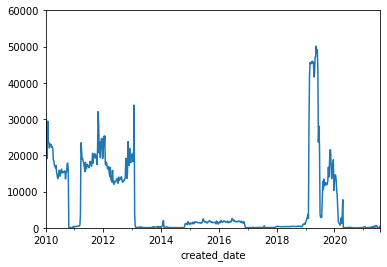

In [383]:
df.resample('W', on='created_date').size().plot(ylim=(0,60000))

In [384]:
#resample because we're looking week by week and caring about the specific week, including the year

## What time of day (by hour) is the least common for 311 complains? The most common?


In [385]:
# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other

In [386]:
df.created_date.dt.hour.value_counts().sort_values(ascending=False).nsmallest(1)

4    14317
Name: created_date, dtype: int64

In [387]:
df.created_date.dt.hour.value_counts().sort_values(ascending=False).nlargest(1)

0    1639112
Name: created_date, dtype: int64

### Make a graph of the results

* Make sure the hours are in the correct order
* Be sure to set the y-axis to start at 0
* Give your plot a descriptive title

<AxesSubplot:title={'center':'311 calls peak at 10 a.m.'}, xlabel='Hour', ylabel='Number of calls'>

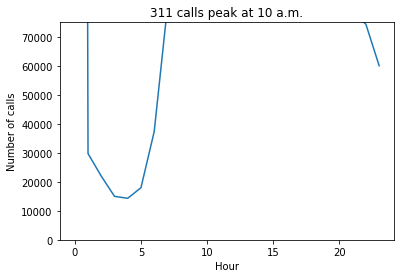

In [388]:
df.created_date.dt.hour.value_counts().sort_index().plot(ylim=[0,75000], title='311 calls peak at 10 a.m.', \
                                                         ylabel='Number of calls', xlabel='Hour')

# Agencies

## What agencies field the most complaints in the dataset? Get the top 5.

Use the `agency` column for this one.

In [389]:
df.agency.value_counts().nlargest(5)

HPD     1990716
DOT      532999
DSNY     453196
DOB      339230
NYPD     279655
Name: agency, dtype: int64

## What are each of those agencies?

Define the following five acronyms:

* NYPD
* HPD
* DOT
* DSNY
* DEP

In [390]:
top5 = ['NYPD', 'HPD', 'DOT', 'DSNY', 'DEP']
df[df['agency'].isin(top5)]['agency_name'].value_counts().head(5)

Department of Housing Preservation and Development    1990598
Department of Transportation                           532998
New York City Police Department                        279204
Department of Environmental Protection                 234843
Department of Sanitation                               108717
Name: agency_name, dtype: int64

## What is the most common complaint to HPD?

In [391]:
# Why did you pick these columns to calculate the answer?
#Complaint type seems the most standardized

In [392]:
df.complaint_type.value_counts().nlargest(1)

HEATING    449240
Name: complaint_type, dtype: int64

## What are the top 3 complaints to each agency?

You'll want to use the weird confusing `.groupby(level=...` thing we learned when reviewing the homework.

In [393]:
df.groupby('agency').complaint_type.value_counts().groupby(level=0, group_keys=False).nlargest(3)

agency  complaint_type                           
3-1-1   Noise Survey                                     31
        Benefit Card Replacement                          2
        City Vehicle Placard Complaint                    1
ACS     Forms                                           118
COIB    Forms                                             4
DCA     Consumer Complaint                             5975
        DCA / DOH New License Application Request      1740
DCAS    Question                                        261
        Comments                                         19
DCP     Research Questions                                9
DEP     Water System                                  78980
        Noise                                         67340
        Sewer                                         56273
DFTA    Housing - Low Income Senior                    1741
        Housing Options                                 514
        Elder Abuse                               

## What is the most common kind of residential noise complaint?

The NYPD seems to deal with a lot of noise complaints at homes. What is the most common subtype?

In [394]:
# Why did you pick these columns to calculate the answer?
# After complaint type, which would contain noise complaint, descriptor provides more detail 

In [395]:
df[df.complaint_type.str.contains('Noise')].descriptor.value_counts()

Loud Music/Party                                             86218
Noise: Construction Before/After Hours (NM1)                 26624
Banging/Pounding                                             25000
Loud Talking                                                 14258
Noise, Barking Dog (NR5)                                      9418
Noise: Construction Equipment (NC1)                           8832
Car/Truck Music                                               7709
Car/Truck Horn                                                5957
Noise: Jack Hammering (NC2)                                   5811
Noise: Alarms (NR3)                                           4045
Noise: air condition/ventilation equipment (NV1)              3362
Engine Idling                                                 3047
Noise, Ice Cream Truck (NR4)                                  2550
Noise: Air Condition/Ventilation Equip, Commercial (NJ2)      1787
Loud Television                                               

## What time of day do "Loud Music/Party" complaints come in? Make it a chart!

In [396]:
# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other

<AxesSubplot:>

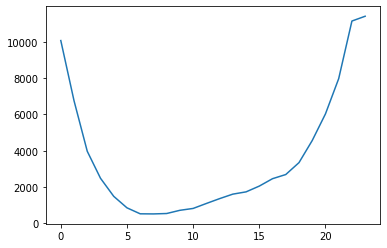

In [397]:
df[df.descriptor == 'Loud Music/Party'].created_date.dt.hour.value_counts().sort_index().plot()

In [398]:
#dt because we're concerned with hour in the day generally, not specific hour on a specific date

## When do people party hard?

Make a monthly chart of Loud Music/Party complaints since the beginning of the dataset. Make it count them on a biweekly basis (every two weeks).

In [399]:
# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other

<AxesSubplot:xlabel='created_date'>

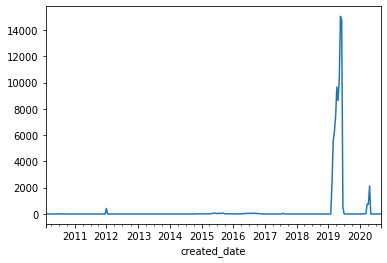

In [400]:
df[df.descriptor == 'Loud Music/Party'].resample('2W', on='created_date').size().plot()

<AxesSubplot:xlabel='created_date'>

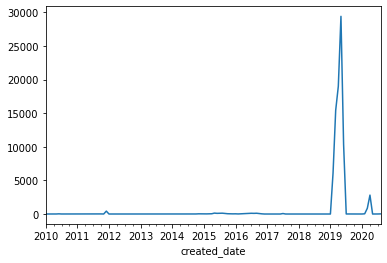

In [401]:
df[df.descriptor == 'Loud Music/Party'].resample('M', on='created_date').size().plot()

## People and their bees

Sometimes people complain about bees! Why they'd do that, I have no idea. It's somewhere in "complaint_type" – can you find all of the bee-related complaints?

In [402]:
bees = df[df.complaint_type.str.contains('Bee')]
bees

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,address_type,city,status,borough,open_data_channel_type
288065,42054326,2019-03-26 19:10:34,2019-04-05 15:00:55,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Beekeeping - Honeybees,1-2 Family Dwelling,11103,24-19 42 STREET,ADDRESS,ASTORIA,Closed,QUEENS,PHONE
291446,42058804,2019-03-26 18:14:03,2019-04-05 15:02:00,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Beekeeping - Honeybees,1-2 Family Dwelling,11104,42-19 42 STREET,ADDRESS,SUNNYSIDE,Closed,QUEENS,PHONE
372834,42163934,2019-04-08 18:26:04,2019-04-29 11:18:17,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Bees/Wasps - Not a beekeper,1-2 Family Dwelling,10302,57 HOOKER PLACE,ADDRESS,STATEN ISLAND,Closed,STATEN ISLAND,PHONE
378505,42171504,2019-04-08 15:50:40,2019-04-29 11:11:42,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Bees/Wasps - Not a beekeper,1-2 Family Mixed Use Building,11214,2060 78 STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,ONLINE
391645,42189666,2019-04-10 19:28:14,2019-04-29 11:17:09,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Beekeeping - Honeybees,1-2 Family Dwelling,10469,1462 STICKNEY PLACE,ADDRESS,BRONX,Closed,BRONX,PHONE
466469,42291921,2019-04-23 11:39:59,2019-05-06 09:36:28,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Bees/Wasps - Not a beekeper,1-2 Family Dwelling,11210,674 EAST 22 STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE
472431,42300656,2019-04-23 14:56:21,2019-05-06 09:37:30,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Bees/Wasps - Not a beekeper,3+ Family Apartment Building,10037,2311 5 AVENUE,ADDRESS,NEW YORK,Closed,MANHATTAN,PHONE
506112,42497797,2019-04-28 15:33:33,2019-05-13 11:10:45,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Beekeeping - Honeybees,1-2 Family Dwelling,11385,2017 HARMAN STREET,ADDRESS,RIDGEWOOD,Closed,QUEENS,ONLINE
532844,42533095,2019-05-02 13:13:47,2019-05-13 11:10:47,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Bees/Wasps - Not a beekeper,1-2 Family Dwelling,11419,107-14 125 STREET,ADDRESS,SOUTH RICHMOND HILL,Closed,QUEENS,ONLINE
547427,42549720,2019-05-02 12:45:50,2019-05-13 11:10:46,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Beekeeping - Honeybees,1-2 Family Dwelling,10309,62 SHARROTTS ROAD,ADDRESS,STATEN ISLAND,Closed,STATEN ISLAND,PHONE


### What month do most of the complaints happen in? I'd like to see a graph.

<AxesSubplot:>

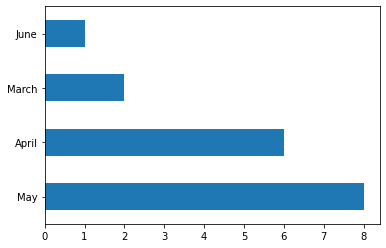

In [403]:
bees.created_date.dt.month_name().value_counts().plot(kind='barh')

### Are the people getting in trouble usually beekeepers or not beekeepers?

In [404]:
bees.descriptor.value_counts(normalize=True)

Bees/Wasps - Not a beekeper    0.529412
Beekeeping - Honeybees         0.470588
Name: descriptor, dtype: float64

# Math with datetimes

## How long does it normally take to resolve a 311 complaint?

Even if we didn't cover this in class, I have faith that you can guess how to calculate it.

In [405]:
df['time_to_fix'] = df.closed_date - df.created_date

In [406]:
df.time_to_fix.mean()

Timedelta('13 days 11:45:19.539945584')

Save it as a new column called `time_to_fix`

## Which agency has the best time-to-fix time?

In [407]:
df.groupby('agency').time_to_fix.mean().sort_values(ascending=False)

agency
DOB      68 days 02:18:38.660278452
TLC      40 days 13:21:01.182287822
EDC      35 days 20:03:47.304347826
DOE      23 days 13:24:39.513853904
DOITT    17 days 01:45:27.645569620
NYCEM    16 days 00:25:52.934615384
DPR      12 days 04:39:49.397268851
HPD      11 days 12:36:53.447180167
DFTA      9 days 18:42:21.829454893
DOHMH     8 days 06:55:13.980678995
DCA       7 days 21:00:02.498509397
DEP       6 days 23:59:29.412053231
DOT       5 days 14:45:18.252221745
DOF       4 days 20:30:04.630305472
DSNY      4 days 11:16:33.815763300
DORIS     3 days 20:56:12.698113207
DHS       1 days 00:03:26.994699646
HRA       0 days 00:00:54.680873991
3-1-1     0 days 00:00:45.117647058
NYPD    -1 days +17:13:31.370282038
ACS                             NaT
COIB                            NaT
DCAS                            NaT
DCP                             NaT
DVS                             NaT
TAX                             NaT
Name: time_to_fix, dtype: timedelta64[ns]

## Maybe we need some more information...

I might want to know how big our sample size is for each of those, maybe the high performers only have one or two instances of having requests filed!

### First, try using `.describe()` on the time to fix column after your `groupby`.

In [408]:
df.groupby('agency').time_to_fix.describe()

,count,mean,std,min,25%,50%,75%,max
agency,,,,,,,,
3-1-1,34,0 days 00:00:45.117647058,0 days 00:01:16.105494846,0 days 00:00:03,0 days 00:00:17.500000,0 days 00:00:35,0 days 00:00:42,0 days 00:07:44
ACS,0,NaT,NaT,NaT,NaT,NaT,NaT,NaT
COIB,0,NaT,NaT,NaT,NaT,NaT,NaT,NaT
DCA,7715,7 days 21:00:02.498509397,24 days 02:24:37.424020452,0 days 00:15:51,1 days 01:32:23.500000,2 days 17:54:37,15 days 04:34:50.500000,537 days 20:01:13
DCAS,0,NaT,NaT,NaT,NaT,NaT,NaT,NaT
DCP,0,NaT,NaT,NaT,NaT,NaT,NaT,NaT
DEP,232419,6 days 23:59:29.412053231,46 days 14:09:49.814494835,-1062 days +08:42:00,0 days 03:01:00,0 days 23:20:00,4 days 05:21:00,3562 days 03:17:00
DFTA,3137,9 days 18:42:21.829454893,5 days 19:08:37.471303582,0 days 00:37:46,4 days 07:15:15,10 days 23:25:31,13 days 21:43:01,33 days 17:46:05
DHS,1132,1 days 00:03:26.994699646,17 days 17:31:01.665163370,0 days 00:00:40,0 days 00:38:20.250000,0 days 01:34:13.500000,0 days 04:23:02.750000,561 days 00:34:39


### Now, an alternative

Seems a little busy, yeah? **You can also do smaller, custom aggregations.**

Try something like this:

```python
# Multiple aggregations of one column
df.groupby('agency').time_to_fix.agg(['median', 'size'])

# You can also do something like this to reach multiple columns
df.groupby('agency').agg({
    'time_to_fix': ['median', 'size']
})
```

In [409]:
df.groupby('agency').time_to_fix.agg(['count', 'mean']).sort_values(by='mean') #use median instead

,count,mean
agency,,
NYPD,278828,-1 days +17:13:31.370282038
3-1-1,34,0 days 00:00:45.117647058
HRA,43616,0 days 00:00:54.680873991
DHS,1132,1 days 00:03:26.994699646
DORIS,53,3 days 20:56:12.698113207
DSNY,451441,4 days 11:16:33.815763300
DOF,62035,4 days 20:30:04.630305472
DOT,524475,5 days 14:45:18.252221745
DEP,232419,6 days 23:59:29.412053231


## Seems weird that NYPD time-to-close is so fast. Can we break that down by complaint type?

Remember the order: 

1. Filter
2. Group
3. Grab a column
4. Do something with it
5. Sort

In [410]:
#data type wrong?

In [411]:
df[df.agency == 'NYPD'].groupby('complaint_type').time_to_fix.mean().sort_values() #use median instead

complaint_type
Blocked Driveway              -3 days +07:15:54.026892522
Encampment                                0 days 01:23:34
Homeless Street Condition       0 days 02:08:40.641025641
Animal-Abuse                    0 days 02:19:17.402597402
Illegal Fireworks                  0 days 02:42:36.700000
Traffic/Illegal Parking         0 days 02:44:14.578947368
Non-Emergency Police Matter     0 days 02:44:19.353900470
Noise - House of Worship        0 days 02:44:42.772435897
Noise - Vehicle                 0 days 02:45:39.629214191
Disorderly Youth                0 days 02:56:51.717391304
Noise - Commercial              0 days 03:02:35.929450211
Noise - Park                    0 days 03:05:06.061608300
Traffic                         0 days 03:11:23.892993630
Noise - Street/Sidewalk         0 days 03:14:04.852310924
Posting Advertisement           0 days 03:24:10.830188679
Urinating in Public                0 days 03:29:09.812500
Noise - Residential             0 days 03:44:51.069732466

## Back to median fix time for all agencies: do these values change based on the borough?

First, use `groupby` to get the median time to fix per agency in each borough. You can use something like `pd.set_option("display.max_rows", 200)` if you can't see all of the results by default!

In [412]:
pd.set_option("display.max_rows", 200)
df.groupby(['agency', 'borough']).time_to_fix.median().sort_values(ascending=False)

agency  borough      
DOITT   Unspecified           165 days 00:01:33
TLC     STATEN ISLAND          43 days 19:21:39
        BRONX                  43 days 11:04:37
        MANHATTAN              41 days 16:19:18
        BROOKLYN               36 days 21:17:28
        QUEENS          29 days 20:15:18.500000
EDC     BRONX                  29 days 09:57:57
        QUEENS          24 days 02:46:23.500000
DOB     BRONX                  23 days 11:10:16
EDC     BROOKLYN               22 days 08:39:46
        MANHATTAN              19 days 00:22:46
        STATEN ISLAND   17 days 22:38:35.500000
DOITT   STATEN ISLAND          17 days 21:47:06
        QUEENS          16 days 00:37:46.500000
DOB     QUEENS                 15 days 11:50:04
DOITT   BRONX                  14 days 15:53:27
        MANHATTAN              14 days 14:11:52
        BROOKLYN               13 days 21:53:22
NYCEM   Unspecified     12 days 03:10:46.500000
DFTA    BRONX           12 days 00:18:41.500000
DOB     BROOKLYN  

### Or, use another technique!

We talked about pivot table for a hot second in class, but it's (potentially) a good fit for this situation:

```python
df.pivot_table(
    columns='what will show up as your columns',
    index='what will show up as your rows',
    values='the column that will show up in each cell',
    aggfunc='the calculation(s) you want dont'
)
```

In [ ]:
pivot = df.pivot_table( #could have made columns = borough, index=agency
        index=['agency', 'borough'],
        values='time_to_fix',
        aggfunc='median'
    )
pivot

### Use the pivot table result to find the worst-performing agency in the Bronx, then compare with Staten Island

Since it's a dataframe, you can use the power of `.sort_values` (twice!). Do any of the agencies have a large difference between the two?

In [414]:
pivot.sort_values(by=['borough', 'time_to_fix'], ascending=(True, False)).head(1)

,,time_to_fix
agency,borough,
TLC,BRONX,43 days 11:04:37


In [415]:
pivot = pivot.reset_index()

In [416]:
pivot[pivot.borough == 'STATEN ISLAND'].sort_values(by='time_to_fix', ascending=False).head(1)

,agency,borough,time_to_fix
99,TLC,STATEN ISLAND,43 days 19:21:39


## What were the top ten 311 types of complaints on Thanksgiving 2020? Are they different than the day before Thanksgiving?

**Finding exact dates is awful, honestly.** While you can do something like this to ask for rows after a specific date:

```python
df[df.date_column >= '2020-01-01']
```

You, for some reason, can't ask for an **exact match** unless you're really looking for exactly at midnight. For example, this won't give you what you want:

```python
df[df.date_column == '2020-01-01']
```

Instead, the thing you need to do is this:

```python
df[(df.date_column >= '2020-01-01') & (df.date_column < '2020-01-02']
```

Everything that starts at midnight on the 1st but *is still less than midnight on the 2nd**.

In [420]:
df[(df.created_date >= '2020-11-26') & (df.created_date < '2020-11-27')]

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,address_type,city,status,borough,open_data_channel_type,time_to_fix
2126217,48258810,2020-11-26 12:00:00,2020-11-28 12:00:00,DSNY,Department of Sanitation,Derelict Vehicles,Derelict Vehicles,Street,11233,216 ROCKAWAY AVENUE,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE,2 days 00:00:00
3519724,48257127,2020-11-26 20:10:55,2020-11-27 17:09:38,DHS,Department of Homeless Services,Homeless Person Assistance,NaN,NaN,11217,4 AVENUE,INTERSECTION,BROOKLYN,Closed,BROOKLYN,PHONE,0 days 20:58:43


In [ ]:
df[(df.created_date >= '2020-11-26') & (df.created_date < '2020-11-27')] \
    .complaint_type.value_counts()

## What is the most common 311 complaint types on Christmas day?

And I mean *all Christmas days*, not just in certain years)

* Tip: `dt.` and `&` are going to be your friend here
* Tip: If you want to get fancy you can look up `strftime`
* Tip: One of those is much much faster than the other

In [418]:
df[(df.created_date.dt.month == 12) & (df.created_date.dt.day == 25)].complaint_type.value_counts().nlargest(1)

HEATING    1418
Name: complaint_type, dtype: int64

# Stories

Let's approach this from the idea of **having stories and wanting to investigate them.** Fun facts:

* Not all of these are reasonably answered with what our data is
* We only have certain skills about how to analyzing the data
* There are about six hundred approaches for each question

But: **for most of these prompts there are at least a few ways you can get something interesting out of the dataset.**

In [ ]:
#You're assuming people complained to the same degree in each year and each firework getting shot off would trigger
#a 311 complaint. Big differences in the number of overall complaints from year to year could destabilize the analysis 

## Sanitation and work slowdowns

The Dept of Sanitation recently had a work slowdown to protest the vaccine mandate. You'd like to write about past work slowdowns that have caused garbage to pile up in the street, streets to not be swept, etc, and compare them to the current slowdown. You've also heard rumors that it was worse in Staten Island and a few Brooklyn neighborhoods - Marine Park and Canarsie - than everywhere else.

Use the data to find timeframes worth researching, and note how this slowdown might compare. Also, is there anything behind the geographic issue?

What assumptions is your analysis making? What could make your analysis fall apart?

In [425]:
#Compare with 2011 Blizzard slowdown: Dec 26-28 2011
#Vax mandate slowdown: Oct 26-28 2021

sanitation = df[df.agency == 'DSNY']

#Same concerns re: complaints being representative of the situation. The 2011 slowdown was also right after Christmsas
#so the holidays may have contributed

In [426]:
sanitation

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,address_type,city,status,borough,open_data_channel_type,time_to_fix
10,41694433,2019-02-13 21:57:00,2019-02-28 09:41:00,DSNY,Department of Sanitation,Electronics Waste Appointment,Ewaste appointment,Sidewalk,11385,89-25 DORAN AVENUE,ADDRESS,Ridgewood,Closed,QUEENS,PHONE,14 days 11:44:00
11,41694434,2019-02-13 16:48:00,2019-02-15 12:33:00,DSNY,Department of Sanitation,Electronics Waste Appointment,Ewaste appointment,Sidewalk,10304,126 VANDERBILT AVENUE,ADDRESS,STATEN ISLAND,Closed,STATEN ISLAND,PHONE,1 days 19:45:00
12,41694435,2019-02-13 16:11:00,2019-02-20 13:00:00,DSNY,Department of Sanitation,Electronics Waste Appointment,Ewaste appointment,Sidewalk,11226,63 CLARKSON AVENUE,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE,6 days 20:49:00
13,41694436,2019-02-13 15:15:00,2019-02-28 10:40:00,DSNY,Department of Sanitation,Electronics Waste Appointment,Ewaste appointment,Sidewalk,11385,263 SAINT NICHOLAS AVENUE,ADDRESS,Ridgewood,Closed,QUEENS,PHONE,14 days 19:25:00
28,41694451,2019-02-13 15:46:00,2019-02-19 12:23:00,DSNY,Department of Sanitation,Electronics Waste Appointment,Ewaste appointment,Sidewalk,11421,88-18 85 STREET,ADDRESS,Woodhaven,Closed,QUEENS,PHONE,5 days 20:37:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999967,24889440,2013-01-28 13:46:00,2013-01-29 12:00:00,DSNY,P - Queens,Dirty Conditions,E12 Illegal Dumping Surveillance,Sidewalk,11368,108-17 35 AVENUE,ADDRESS,Corona,Closed,QUEENS,PHONE,0 days 22:14:00
3999982,24888329,2013-01-28 20:16:00,2013-01-29 12:00:00,DSNY,BCC - Brooklyn South,Missed Collection (All Materials),2R Bulk-Missed Recy Collection,Sidewalk,11235,2928 BRIGHTON 8 STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,ONLINE,0 days 15:44:00
3999989,24888315,2013-01-28 08:40:00,2013-01-29 12:00:00,DSNY,BCC - Staten Island,Snow,15I Street Condition Ice-Non Storm,Street,10310,156 CLOVE ROAD,ADDRESS,STATEN ISLAND,Closed,STATEN ISLAND,PHONE,1 days 03:20:00
3999994,24890451,2013-01-29 12:35:00,2013-02-01 12:00:00,DSNY,A - Brooklyn,Dirty Conditions,E3 Dirty Sidewalk,Sidewalk,11237,249 HARMAN STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE,2 days 23:25:00


In [427]:
sanitation[(sanitation.created_date >= '2021-10-26') & (sanitation.created_date < '2021-10-28')].shape

(0, 16)

In [428]:
sanitation[(sanitation.created_date >= '2011-12-26') & (sanitation.created_date < '2021-12-28')].shape

(295339, 16)

## 311 quirks

Our editor tried to submit a 311 request using the app the other day, but it didn't go through. As we all know, news is what happens to your editor! Has the 311 mobile app ever actually stopped working?

If that's a dead end, maybe you can talk about the differences between the different submission avenues: could a mobile outage disproportionately impact a certain kind of complaint or agency? How about if the phone lines stopped working?

What assumptions is your analysis making? What could make your analysis fall apart?

In [443]:
df.open_data_channel_type.value_counts()

UNKNOWN    2155609
PHONE      1195790
ONLINE      452001
MOBILE      139361
OTHER        57239
Name: open_data_channel_type, dtype: int64

<AxesSubplot:xlabel='created_date'>

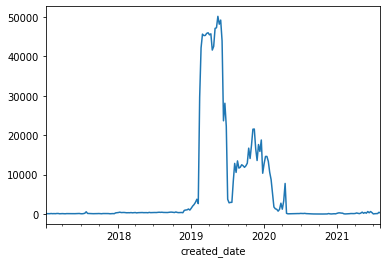

In [447]:
df[df.created_date > '2017-01-01'].resample('W', on='created_date').size().plot()

<AxesSubplot:xlabel='created_date'>

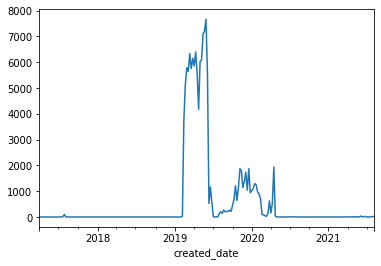

In [448]:
df[(df.created_date > '2017-01-01') & (df.open_data_channel_type == 'MOBILE')].resample('W', on='created_date').size().plot()

In [ ]:
#Analysis assumes that a lack of complaints reflects an app malfunciton
#Relying on noticable difference in the charts, but the app not working may not be the only reason for dips

In [ ]:
pd.set_option("display.max_rows", 200)

(pd.crosstab(df.agency, df.open_data_channel_type, normalize='index') * 100).astype(int)

## NYCHA and public funds

NYC's public housing infrastructure is failing, and one reason is lack of federal funds. While the recent spending bills passed through Congress might be able to help, the feeling is that things have really fallen apart in the past however-many years – as time goes on it gets more and more difficult for the agency in control of things to address issues in a timely manner.

If you were tasked with finding information to help a reporter writing on this topic, you will **not** reasonably be able to find much in the dataset to support or refute this. Why not? 

If you wanted to squeeze something out of this dataset anyway, what could an option be? (You might need to bring in another dataset.)

In [ ]:
#NYCHA is not an agency in the dataset
#You could take the time to close a complaint and see if it has gotten worse over time - but this doesn't account 
#for changes in the volume of complaints. The data also doesn't have info on funding, and we don't know that if a 
#complaint has been closed that it's actually been addressed

<AxesSubplot:xlabel='created_date'>

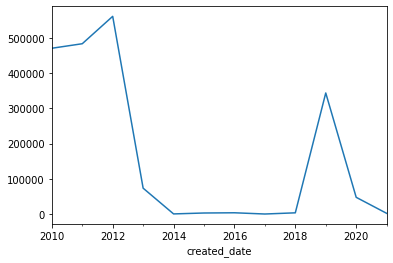

In [441]:
df[df.agency == 'HPD'].resample('A', on='created_date').size().plot()